## 특징별로 시각화(1)

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### 1. 시간대별로 시각화
관련 헤더
- /header/header/date : 최초 발송 시간
- /header/received/0/src_at : 최종 도착 시간

In [45]:
eml_df = pd.read_csv("../../parsed_eml_3.csv", parse_dates=["/header/header/date", "/header/received/0/src_at"],
                      date_parser=lambda col: pd.to_datetime(col, utc=True))
# time-zone은 +00:00으로 일정하게 맞춰짐

In [46]:
# 이전의 index값이 계속 쌓임, 일단 제거
del eml_df["Unnamed: 0"]
del eml_df["Unnamed: 0.1"]
del eml_df["Unnamed: 0.1.1"]

In [78]:
# null 값인 행
null_date=eml_df["/header/header/date"].isnull()

In [81]:
# 결과 값이 float type으로 나오는 것 방지하기 위해(Null 값 때문에 그래보여서 null 값 없앤 것)
origin_send_date_info = "/header/header/date"
temp_df = pd.DataFrame()
temp_df[origin_send_date_info + "_year"] = eml_df.loc[~null_date, origin_send_date_info].dt.year
temp_df[origin_send_date_info + "_month"] = eml_df.loc[~null_date, origin_send_date_info].dt.month
temp_df[origin_send_date_info + "_day"] = eml_df.loc[~null_date, origin_send_date_info].dt.day
temp_df[origin_send_date_info + "_hour"] = eml_df.loc[~null_date, origin_send_date_info].dt.hour
temp_df[origin_send_date_info + "_minute"] = eml_df.loc[~null_date, origin_send_date_info].dt.minute
temp_df[origin_send_date_info + "_second"] = eml_df.loc[~null_date, origin_send_date_info].dt.second

In [83]:
temp_df

,/header/header/date_year,/header/header/date_month,/header/header/date_day,/header/header/date_hour,/header/header/date_minute,/header/header/date_second
0,2019,8,29,11,39,36
1,2020,4,5,20,29,25
2,2019,7,5,6,42,8
3,2020,6,10,16,38,23
4,2020,5,16,2,6,45
...,...,...,...,...,...,...
149,2020,4,13,15,54,50
150,2020,4,6,5,49,16
151,2020,4,13,18,27,42
152,2020,4,5,22,33,3


In [84]:
last_received_date_info = "/header/received/0/src_at"

eml_df[last_received_date_info + "_year"] = eml_df[last_received_date_info].dt.year
eml_df[last_received_date_info + "_month"] = eml_df[last_received_date_info].dt.month
eml_df[last_received_date_info + "_day"] = eml_df[last_received_date_info].dt.day
eml_df[last_received_date_info + "_hour"] = eml_df[last_received_date_info].dt.hour
eml_df[last_received_date_info + "_minute"] = eml_df[last_received_date_info].dt.minute
eml_df[last_received_date_info + "_second"] = eml_df[last_received_date_info].dt.second

In [76]:
def visualization_datetime(df, column, title):
    figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
    figure.set_size_inches(25,12)
    figure.suptitle(title, fontsize=30)
    
    sns.countplot(x=column+'_year', data=df, ax=ax1)
    sns.countplot(x=column+'_month', data=df, ax=ax2)
    sns.countplot(x=column+'_day', data=df, ax=ax3)
    sns.countplot(x=column+'_hour', data=df, ax=ax4)
    sns.countplot(x=column+'_minute', data=df, ax=ax5)
    
    #.set_title("year")

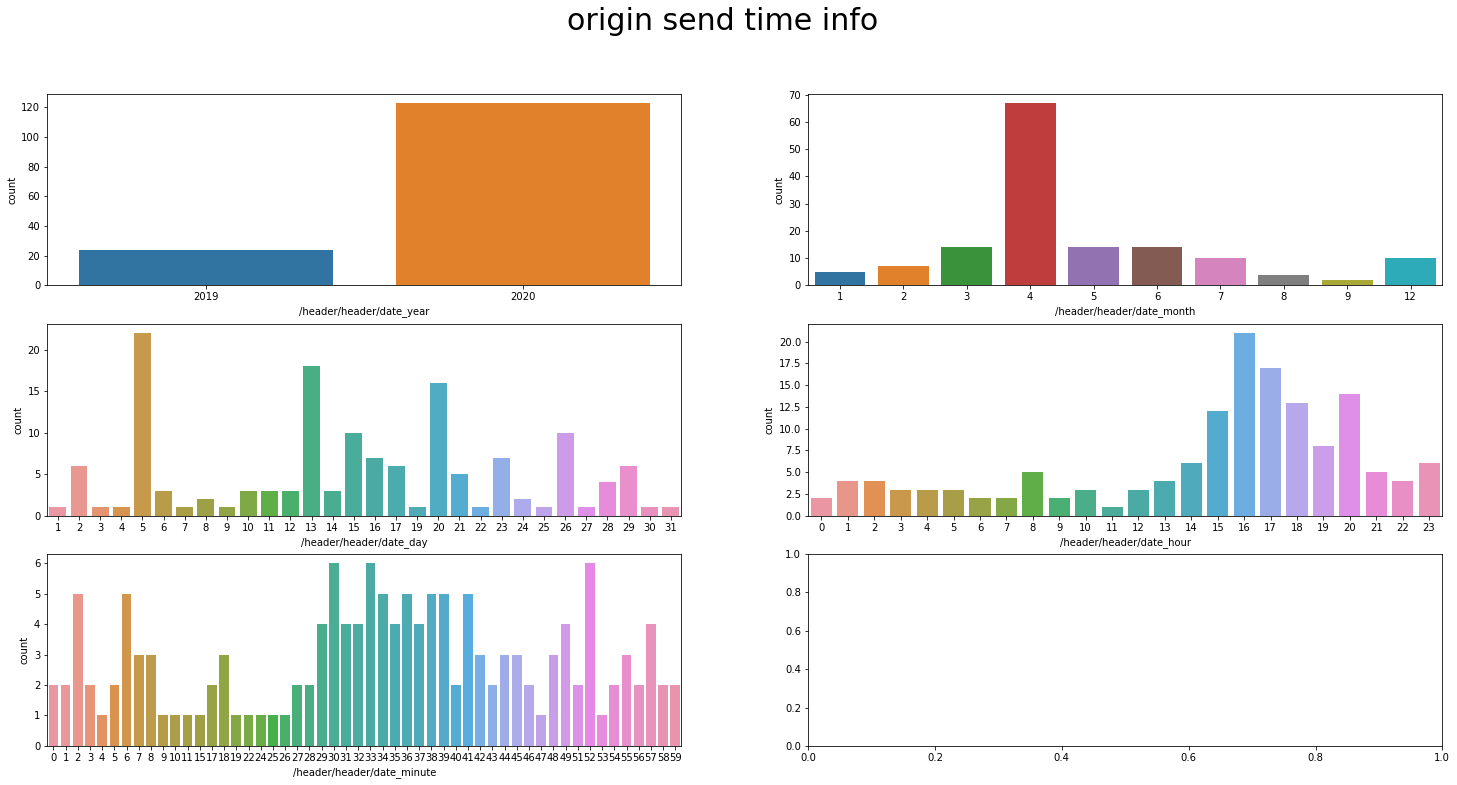

In [85]:
# 최초 발송 시간별 시각화
visualization_datetime(temp_df, "/header/header/date", "origin send time info")

In [87]:
#visualization_datetime(eml_df, "/header/header/date", "origin send time info")

In [88]:
eml_df.loc[null_date, "/header/header/date_existence"] = 'X'
eml_df.loc[~null_date, "/header/header/date_existence"] = 'O'

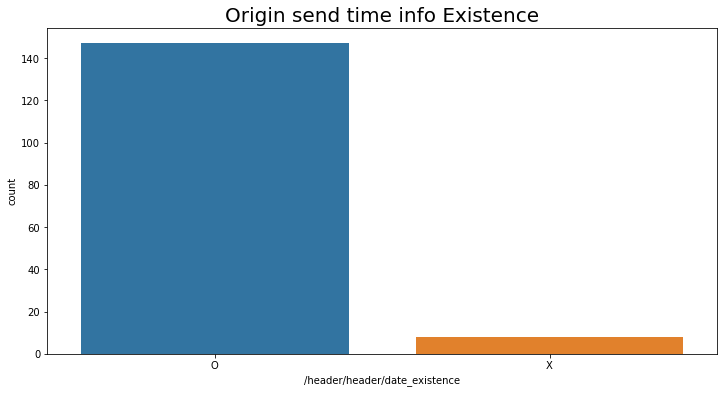

In [89]:
# /header/header/date 빈 값 시각화
plt.figure(figsize=(12,6))
plt.title('Origin send time info Existence', fontsize=20)
sns.countplot(x="/header/header/date_existence", data=eml_df)
plt.show()

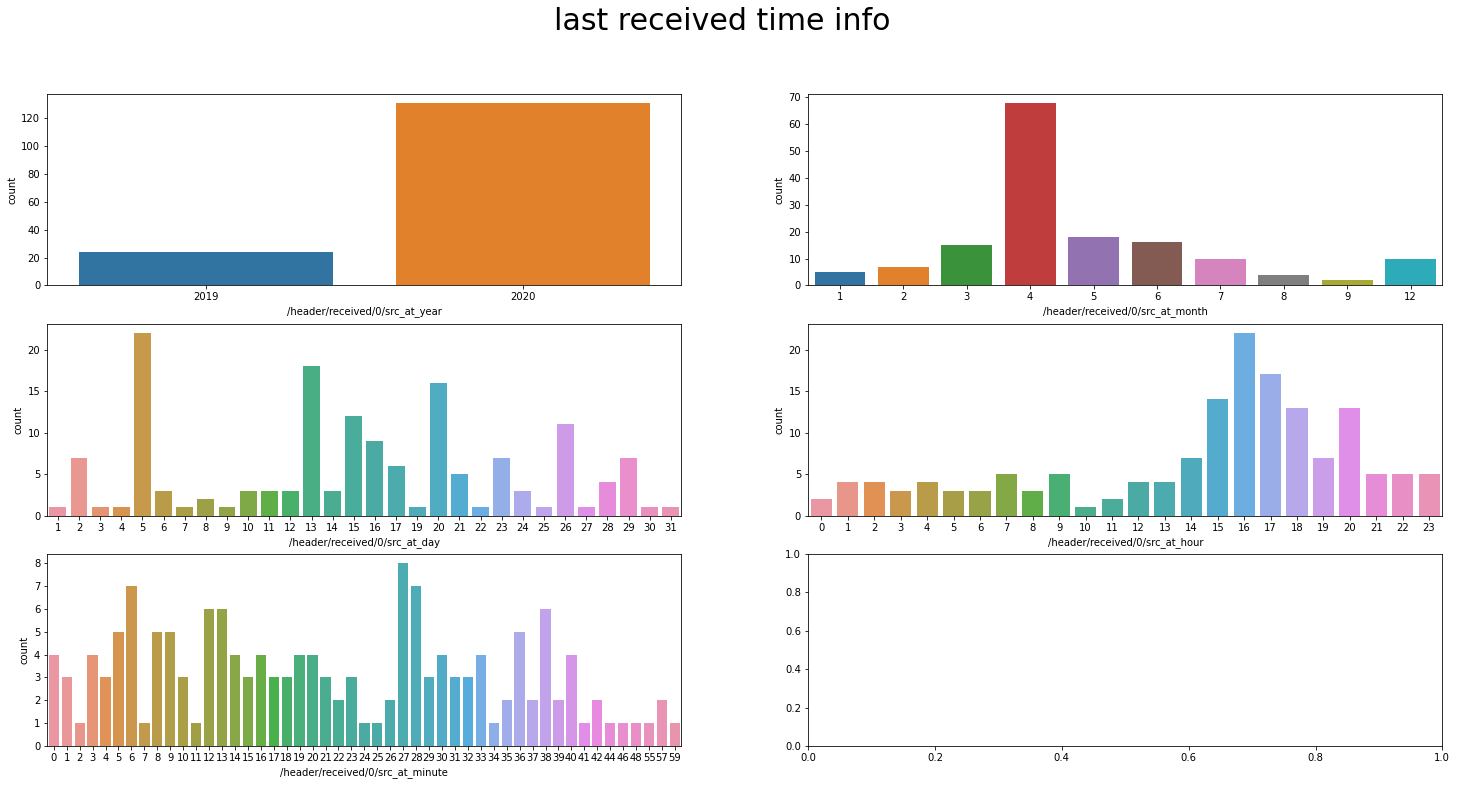

In [90]:
# 최종 수신 시간별 시각화
visualization_datetime(eml_df, "/header/received/0/src_at", "last received time info")